In [1]:
import bisect
# import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import interpolate
import seaborn as sns
# from networkx.drawing.nx_pydot import graphviz_layout
# import pydot

import dalmatian 

from helper import *
import gk_helper  
from scipy.stats import iqr



# Specify inputs 

In [2]:
# Specify wbc and treatment files for growth kinetics 

patient = 'RP-1403_JB-0132'

wbc_file = 'data/JB_0132_wbc.txt'

# Load treatment file 
treatment = pd.read_csv("data/JB_0132_tx.txt", sep = '\t')


In [3]:
# Get input files from Terra through dalmatian
workspace ='broad-firecloud-ibmwatson/Brown_Getz_IBM_99-224_Exomes_Liang'
wm = dalmatian.WorkspaceManager(workspace)

participants = wm.get_participants()


cluster_CCF_df = pd.read_csv(participants.loc[patient]['cluster_ccfs'], sep='\t')
abundance_df = pd.read_csv('/Users/lil/PycharmProjects/JB_Growth_Kinetics/Cell_Population/JB-0132_cell_population_abundances.tsv', sep='\t')
mcmc_df = pd.read_csv('/Users/lil/PycharmProjects/JB_Growth_Kinetics/Cell_Population/JB-0132_cell_population_mcmc_trace.tsv', sep='\t')
tree_df = pd.read_csv(participants.loc[patient]['tree_tsv'], sep='\t')

In [4]:
mcmc_df

,Patient_ID,Sample_ID,Iteration,Cluster_ID,Abundance
0,JB-0132,RP-1403_JB-0132-T-02v2_v2_Exome_OnPrem,0,1,68
1,JB-0132,RP-1403_JB-0132-T-02v2_v2_Exome_OnPrem,0,2,19
2,JB-0132,RP-1403_JB-0132-T-02v2_v2_Exome_OnPrem,0,3,0
3,JB-0132,RP-1403_JB-0132-T-02v2_v2_Exome_OnPrem,0,4,0
4,JB-0132,RP-1403_JB-0132-T-02v2_v2_Exome_OnPrem,0,5,0
...,...,...,...,...,...
19245,JB-0132,RP-1918_JB-0132-T-09_v1_Exome_OnPrem,249,3,71
19246,JB-0132,RP-1918_JB-0132-T-09_v1_Exome_OnPrem,249,4,5
19247,JB-0132,RP-1918_JB-0132-T-09_v1_Exome_OnPrem,249,5,0
19248,JB-0132,RP-1918_JB-0132-T-09_v1_Exome_OnPrem,249,6,23


# Helper functions to parse the input files 

In [5]:
times_sample, times, times_interpolate, wbc, wbc_interpolate, sample_list, wbc_sample, times_others = gk_helper.load_wbc_file(wbc_file)

In [6]:
times_sample

[1169, 2044, 4396, 4529, 4648, 4732, 4809, 4907, 4942, 4958, 5001]

In [7]:
treatment = treatment[1:]

In [8]:
treatment

,tx,tx_start,tx_end
1,FR + Obataclax,1169,1337.0
2,BR + Ibrutinib,2044,2212.0
3,Ibrutinib,2212,4060.0
4,Duvelisib and Venetoclax,4950,NaN


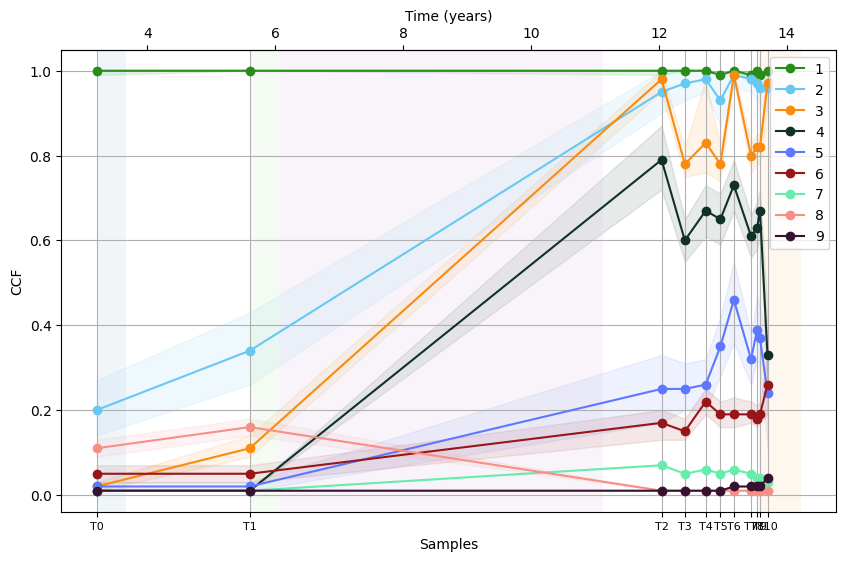

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))
gk_helper.plot_ccf(cluster_CCF_df,ax, times_sample, treatment )

In [10]:
cluster_list, cluster_abundance = gk_helper.get_abundance(abundance_df, mcmc_df, sample_list)

In [11]:
cluster_abundance

{1: [0.65, 0.47, 0.02, 0.03, 0.0, 0.12, 0.0, 0.0, 0.04, 0.05, 0.01],
 2: [0.22, 0.26, 0.0, 0.17, 0.23, 0.05, 0.0, 0.17, 0.2, 0.06, 0.02],
 3: [0.01, 0.1, 0.19, 0.24, 0.08, 0.12, 0.25, 0.22, 0.14, 0.18, 0.63],
 4: [0.0, 0.0, 0.57, 0.32, 0.45, 0.33, 0.19, 0.33, 0.27, 0.38, 0.1],
 5: [0.0, 0.0, 0.03, 0.1, 0.03, 0.18, 0.36, 0.07, 0.14, 0.15, 0.0],
 6: [0.01, 0.01, 0.18, 0.13, 0.2, 0.18, 0.19, 0.2, 0.2, 0.16, 0.23],
 8: [0.11, 0.16, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0, 0.01, 0.01, 0.01]}

In [12]:
# calculate only at sample points
subclone_sample, log_subclone_sample,  = gk_helper.calc_subclone(wbc_sample, cluster_abundance, cluster_list, input_type = "default")

In [13]:
log_subclone_sample

{1: [np.float64(2.2155457156124085),
  np.float64(1.431241435786042),
  np.float64(-1.0476958152686708),
  np.float64(-0.29037235468466926),
  np.float64(-5.712621423323405),
  np.float64(1.5956038616945885),
  np.float64(-5.2476242522325185),
  np.float64(-4.704217339589325),
  np.float64(1.3568876923054696),
  np.float64(1.7147142645502753),
  np.float64(-2.7902151591568476)],
 2: [np.float64(1.1325015069344015),
  np.float64(0.839362170210563),
  np.float64(-6.351000723327746),
  np.float64(1.4414889729623168),
  np.float64(2.0284776667119604),
  np.float64(0.7213001406994698),
  np.float64(-5.2476242522325185),
  np.float64(2.7347542528065363),
  np.float64(2.964328599582634),
  np.float64(1.8967030980006179),
  np.float64(-2.1020307679390315)],
 3: [np.float64(-1.9490450577508007),
  np.float64(-0.11553431592286792),
  np.float64(1.1991346191606824),
  np.float64(1.786157976787708),
  np.float64(0.9732395237449539),
  np.float64(1.5956038616945885),
  np.float64(2.5768216786451004

In [14]:
def get_all_abundance(cluster_list, mcmc_df, sample_list, times_sample):
    
    """
    Get cell abundance and interpolated cell abundance from all mcmc iterations

    Args:
        cluster_list, mcmc_df, sample_list
    Returns:
        a dictionary with key: cluster and value: 250 iterations of cell abundance

    """
    all_abundance = {}
    interpolated_all_abundance = {}
    for cluster in cluster_list:

        abundance_per_iter ={}
        inter_abundance_per_iter = {}
        for iter_idx in range(250):

            df_mcmc_iter_clust = mcmc_df[(mcmc_df.Iteration == iter_idx) & (mcmc_df.Cluster_ID == cluster) ]

            cluster_abundances = []
            ## iterate through the samples in the wbc file to make sure the order is correct
            for sample_name in sample_list:
                sample_abundance = float(df_mcmc_iter_clust[df_mcmc_iter_clust.Sample_ID == sample_name].Abundance)
                cluster_abundances.append(sample_abundance / 100)

            abundance_per_iter[iter_idx] = cluster_abundances
            
            
        all_abundance[cluster] = abundance_per_iter
        
    return all_abundance

In [15]:
all_abundance = gk_helper.get_all_abundance(cluster_list, mcmc_df, sample_list, times_sample, )

In [16]:
subclone_sample_mcmc, log_subclone_sample_mcmc = gk_helper.calc_subclone(wbc_sample, all_abundance, cluster_list,input_type = "mcmc")

In [17]:
def slice_wbc(dfd_first, dfd_last, times, wbc, times_sample):
    '''
    select wbc between the two dfds 

    
    '''
    last_sample_time = times_sample[-1]

    times_selected = [time_ for time_ in times if time_ <= dfd_last and time_ >=dfd_first]

    smallest_times_selected = min(times_selected)
    largest_times_selected = max(times_selected)

    smallest_index = times.index(smallest_times_selected)
    largest_index = times.index(largest_times_selected)

    wbc_selected = wbc[smallest_index: largest_index+ 1]

    return times_selected, wbc_selected

In [18]:
# Select the time period where exponential pattern is assumed 

exp_sample_start = 1
exp_sample_end = 2


In [19]:
times_sliced, wbc_sliced = slice_wbc(times_sample[exp_sample_start], times_sample[exp_sample_end], times, wbc, times_sample)

In [20]:
log_subclone_sample


{1: [np.float64(2.2155457156124085),
  np.float64(1.431241435786042),
  np.float64(-1.0476958152686708),
  np.float64(-0.29037235468466926),
  np.float64(-5.712621423323405),
  np.float64(1.5956038616945885),
  np.float64(-5.2476242522325185),
  np.float64(-4.704217339589325),
  np.float64(1.3568876923054696),
  np.float64(1.7147142645502753),
  np.float64(-2.7902151591568476)],
 2: [np.float64(1.1325015069344015),
  np.float64(0.839362170210563),
  np.float64(-6.351000723327746),
  np.float64(1.4414889729623168),
  np.float64(2.0284776667119604),
  np.float64(0.7213001406994698),
  np.float64(-5.2476242522325185),
  np.float64(2.7347542528065363),
  np.float64(2.964328599582634),
  np.float64(1.8967030980006179),
  np.float64(-2.1020307679390315)],
 3: [np.float64(-1.9490450577508007),
  np.float64(-0.11553431592286792),
  np.float64(1.1991346191606824),
  np.float64(1.786157976787708),
  np.float64(0.9732395237449539),
  np.float64(1.5956038616945885),
  np.float64(2.5768216786451004

1 [-0.38469902  3.58555595]
2 [-1.11585138  7.08812992]
3 [ 0.20401963 -1.25804422]
4 [  1.44660507 -15.12527747]
5 [  0.9901554  -12.56915934]
6 [ 0.55157602 -5.49799429]
8 [-0.32433708  2.17038226]


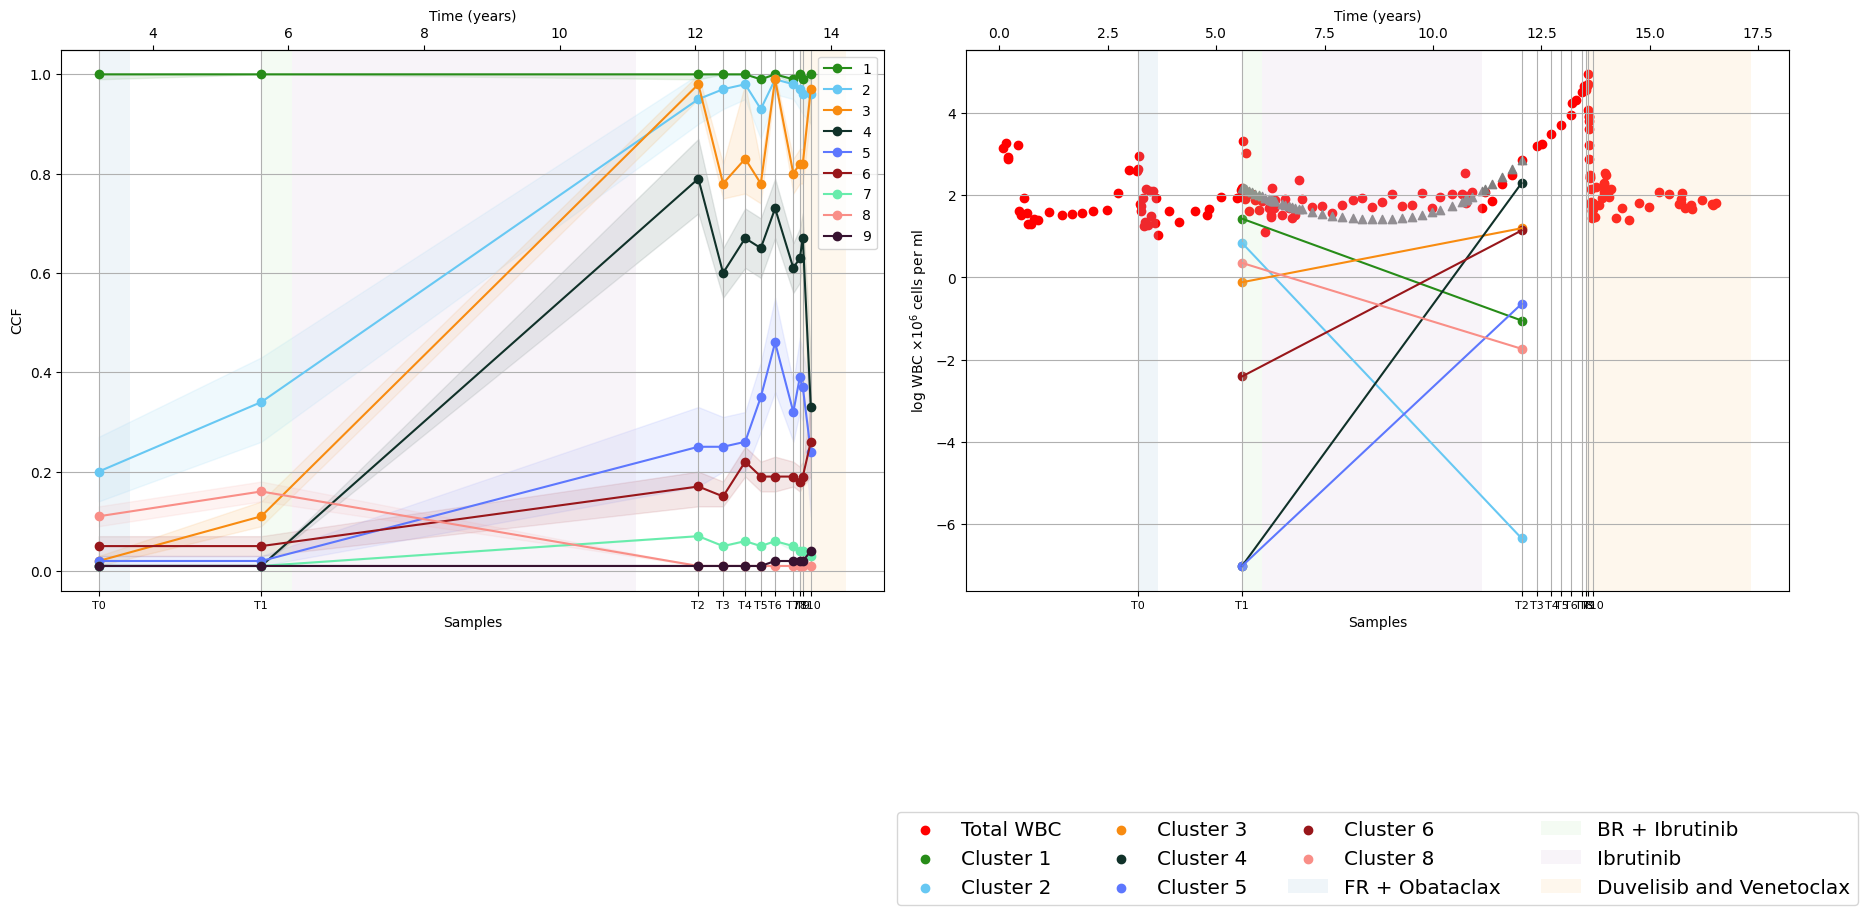

In [24]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

tick_num = len(sample_list)

tick_list = ['T'+ str(i) for i in range(tick_num)]


def plot_sub(ax, clusters):
    
        
    # plot total wbc
    
    x_year_selected = [ i/365 for i in np.array(times)]
    ax.scatter(x_year_selected,np.log(wbc), label = 'Total WBC', c = 'red')



    cluster_cell_population = {}
    for i in clusters:
        
        
        
        exp_times = times_sample[exp_sample_start : exp_sample_end + 1 ]
        exp_year = [ i/365 for i in np.array(exp_times)]
        exp_subclone = log_subclone_sample[i][exp_sample_start : exp_sample_end + 1 ]

        
        ax.scatter(exp_year,exp_subclone, label = f'Cluster {i}',c= ClusterColors.get_hex_string(i),)
        
        model = np.polyfit(exp_year, exp_subclone, 1)
        print(i, model)

        predict_x = times_sliced
 
        predict_year = [ i/365 for i in np.array(predict_x)]
        predicted = np.polyval(model, predict_year)
        plt.plot(predict_year, predicted, color=ClusterColors.get_hex_string(i))

        natural_exponential = [ np.exp(i) for i in predicted]
        cluster_cell_population[i] = natural_exponential
    
    predicted_total = []
    for timepoint in range(len(predict_year)):
        predicted_wbc = 0
        for cluster in cluster_cell_population:
            predicted_wbc += cluster_cell_population[cluster][timepoint]
        predicted_total.append(predicted_wbc)
        
    # convert back to log scale
    predicted_total_log = [np.log(i) for i in predicted_total]
    
    plt.scatter(predict_year, predicted_total_log, color='grey',marker='^', alpha = 1)

    
    x_axis = [i/365 for i in times_sample]
    ax.set_xticks(x_axis)

    secax = ax.secondary_xaxis('top')
    secax.set_xlabel("Time (years)")
    ax.grid(True)

    
    ax.set_xticklabels(tick_list, fontsize =8)
    ax.set_ylabel(r"log WBC $\times 10^6$ cells per ml")

    
    cmap = plt.get_cmap("Pastel1")
    xlim = ax.get_xlim()[1]
    
    for i, row in treatment.iterrows():
        treatment_name = row.tx
        start = row.tx_start/365
        end = row.tx_end/365
        if np.isnan(end):
            end = xlim
        length = end - start 
        center = (start + end)/2
        ax.axvspan(xmin = start, xmax= end, label = treatment_name, facecolor= cmap(i), alpha = 0.2)
#         ax.legend(ncol = treatment.shape[0], loc='upper center', bbox_to_anchor=(0.5, -2), fontsize = 'x-large')
        ax.set_xlabel('Samples')


gk_helper.plot_ccf(cluster_CCF_df,ax1, times_sample, treatment )

plot_sub(ax2, [1,2,3,4,5,6,8])
ax2.legend(ncol = treatment.shape[0], loc='lower center',  bbox_to_anchor=(0.5, -0.6),fontsize = 'x-large')

In [27]:
# Select the time period where exponential pattern is assumed 

exp_sample_start = 2
exp_sample_end = 8
times_sliced, wbc_sliced = slice_wbc(times_sample[exp_sample_start], times_sample[exp_sample_end], times, wbc, times_sample)

1 [-0.57434097  5.40263671]
2 [  3.56957752 -46.29647915]
3 [  1.13175588 -12.63959039]
4 [ 0.7151273  -6.56300489]
5 [  2.07184483 -25.34961314]
6 [  1.31178247 -14.8706338 ]


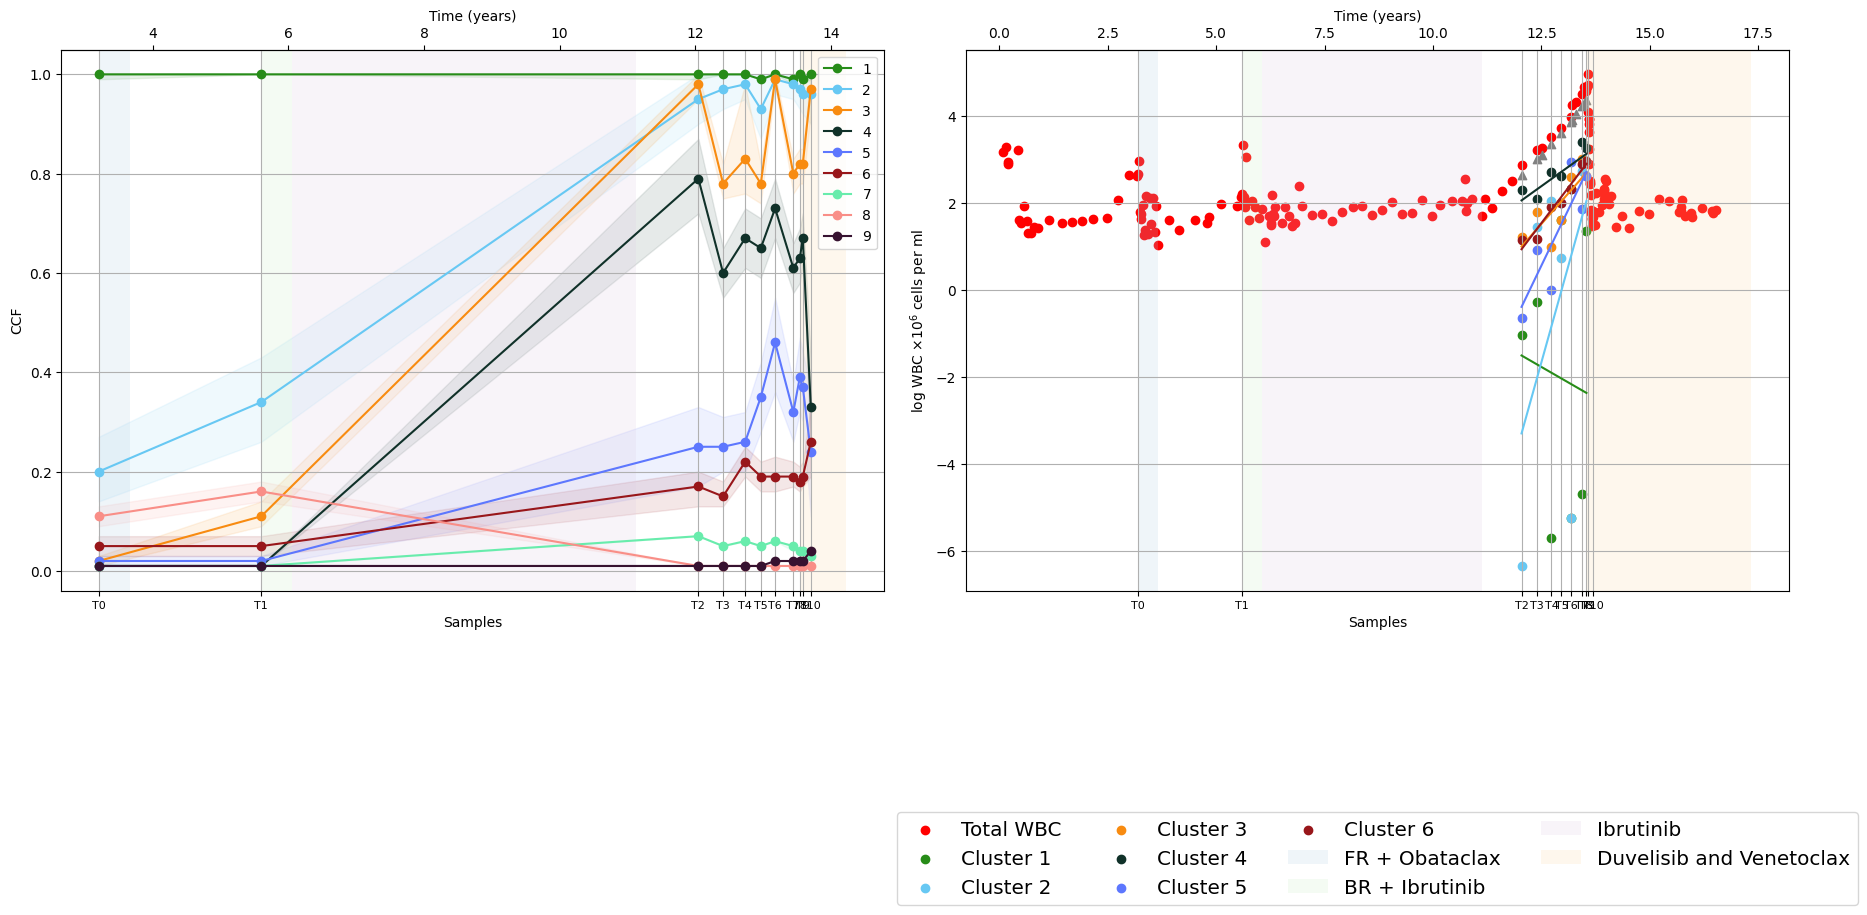

In [29]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

tick_num = len(sample_list)

tick_list = ['T'+ str(i) for i in range(tick_num)]


def plot_sub(ax, clusters):
    
        
    # plot total wbc
    
    x_year_selected = [ i/365 for i in np.array(times)]
    ax.scatter(x_year_selected,np.log(wbc), label = 'Total WBC', c = 'red')



    cluster_cell_population = {}
    for i in clusters:
        
        
        
         # Interpolate during treatment 

        exp_times = times_sample[exp_sample_start : exp_sample_end + 1 ]
        exp_year = [ i/365 for i in np.array(exp_times)]
        exp_subclone = log_subclone_sample[i][exp_sample_start : exp_sample_end + 1 ]

        
        ax.scatter(exp_year,exp_subclone, label = f'Cluster {i}',c= ClusterColors.get_hex_string(i),)
        
        model = np.polyfit(exp_year, exp_subclone, 1)
        print(i, model)

        predict_x = times_sliced
 
        predict_year = [ i/365 for i in np.array(predict_x)]
        predicted = np.polyval(model, predict_year)
        plt.plot(predict_year, predicted, color=ClusterColors.get_hex_string(i))

        natural_exponential = [ np.exp(i) for i in predicted]
        cluster_cell_population[i] = natural_exponential
    
    predicted_total = []
    for timepoint in range(len(predict_year)):
        predicted_wbc = 0
        for cluster in cluster_cell_population:
            predicted_wbc += cluster_cell_population[cluster][timepoint]
        predicted_total.append(predicted_wbc)
        
    # convert back to log scale
    predicted_total_log = [np.log(i) for i in predicted_total]
    
    plt.scatter(predict_year, predicted_total_log, color='grey',marker='^', alpha = 1)

    
    x_axis = [i/365 for i in times_sample]
    ax.set_xticks(x_axis)

    secax = ax.secondary_xaxis('top')
    secax.set_xlabel("Time (years)")
    ax.grid(True)

    
    ax.set_xticklabels(tick_list, fontsize =8)
    ax.set_ylabel(r"log WBC $\times 10^6$ cells per ml")

    
    cmap = plt.get_cmap("Pastel1")
    xlim = ax.get_xlim()[1]
    
    for i, row in treatment.iterrows():
        treatment_name = row.tx
        start = row.tx_start/365
        end = row.tx_end/365
        if np.isnan(end):
            end = xlim
        length = end - start 
        center = (start + end)/2
        ax.axvspan(xmin = start, xmax= end, label = treatment_name, facecolor= cmap(i), alpha = 0.2)
#         ax.legend(ncol = treatment.shape[0], loc='upper center', bbox_to_anchor=(0.5, -2), fontsize = 'x-large')
        ax.set_xlabel('Samples')


gk_helper.plot_ccf(cluster_CCF_df,ax1, times_sample, treatment )

plot_sub(ax2, [1,2,3,4,5,6,])
ax2.legend(ncol = treatment.shape[0], loc='lower center',  bbox_to_anchor=(0.5, -0.6),fontsize = 'x-large')

In [25]:
times_sample[exp_sample_start : exp_sample_end + 1 ]

[2044, 4396]

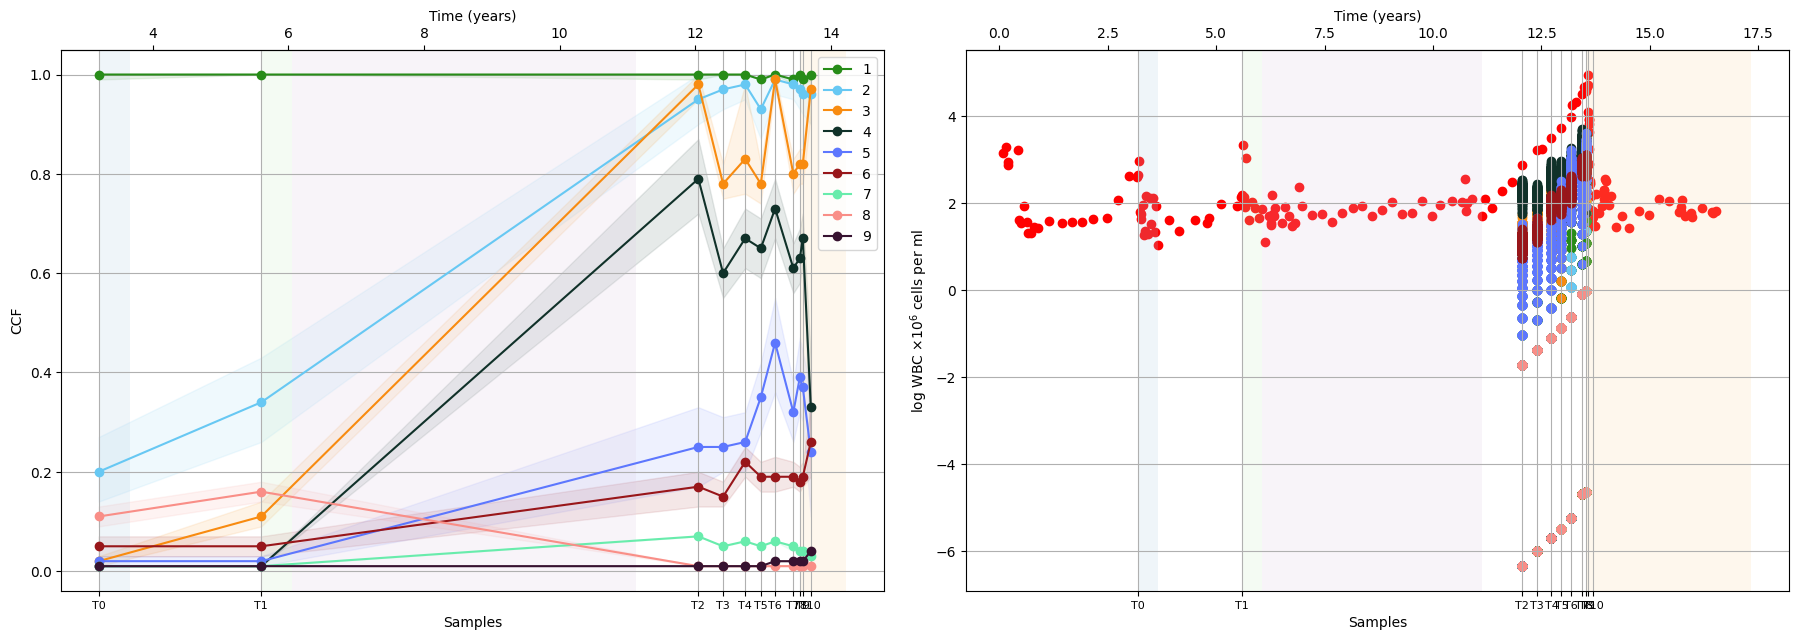

In [31]:
fig,(ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.3)

tick_num = len(sample_list)

tick_list = ['T'+ str(i) for i in range(tick_num)]
PLCG2_rate_mcmc = []

def plot_sub(ax, clusters):
    
        
    # plot total wbc
    
    x_year_selected = [ i/365 for i in np.array(times)]
    ax.scatter(x_year_selected,np.log(wbc), label = 'Total WBC', c = 'red')


    
    cluster_cell_population = {}
    for i in clusters:
        
        for iter_idx in range(250):

            
            exp_times = times_sample[exp_sample_start : exp_sample_end + 1 ]
            exp_year = [ i/365 for i in np.array(exp_times)]
            exp_subclone = log_subclone_sample_mcmc[i][iter_idx][exp_sample_start : exp_sample_end + 1 ]


            ax.scatter(exp_year,exp_subclone, label = f'Cluster {i}',c= ClusterColors.get_hex_string(i),)

            model = np.polyfit(exp_year, exp_subclone, 1)
            
            if i ==6:
                
                PLCG2_rate_mcmc.append(model[0])
    
      

    
    x_axis = [i/365 for i in times_sample]
    ax.set_xticks(x_axis)

    secax = ax.secondary_xaxis('top')
    secax.set_xlabel("Time (years)")
    ax.grid(True)

    
    ax.set_xticklabels(tick_list, fontsize =8)
    ax.set_ylabel(r"log WBC $\times 10^6$ cells per ml")

    
    cmap = plt.get_cmap("Pastel1")
    xlim = ax.get_xlim()[1]
    
    for i, row in treatment.iterrows():
        treatment_name = row.tx
        start = row.tx_start/365
        end = row.tx_end/365
        if np.isnan(end):
            end = xlim
        length = end - start 
        center = (start + end)/2
        ax.axvspan(xmin = start, xmax= end, label = treatment_name, facecolor= cmap(i), alpha = 0.2)
#         ax.legend(ncol = treatment.shape[0], loc='upper center', bbox_to_anchor=(0.5, -2), fontsize = 'x-large')
        ax.set_xlabel('Samples')


gk_helper.plot_ccf(cluster_CCF_df,ax1, times_sample, treatment )

plot_sub(ax2, [1,2,3,4,5,6,8])
# ax2.legend(ncol = treatment.shape[0], loc='lower center',  bbox_to_anchor=(0.5, -0.6),fontsize = 'x-large')

In [32]:
lower_ci = np.percentile(PLCG2_rate_mcmc, 2.5, axis=0)
upper_ci = np.percentile(PLCG2_rate_mcmc, 97.5, axis=0)
mean = np.mean(PLCG2_rate_mcmc)

In [33]:
lower_ci, mean, upper_ci

(np.float64(1.1037195343359205),
 np.float64(1.256460965277434),
 np.float64(1.4220483751385253))

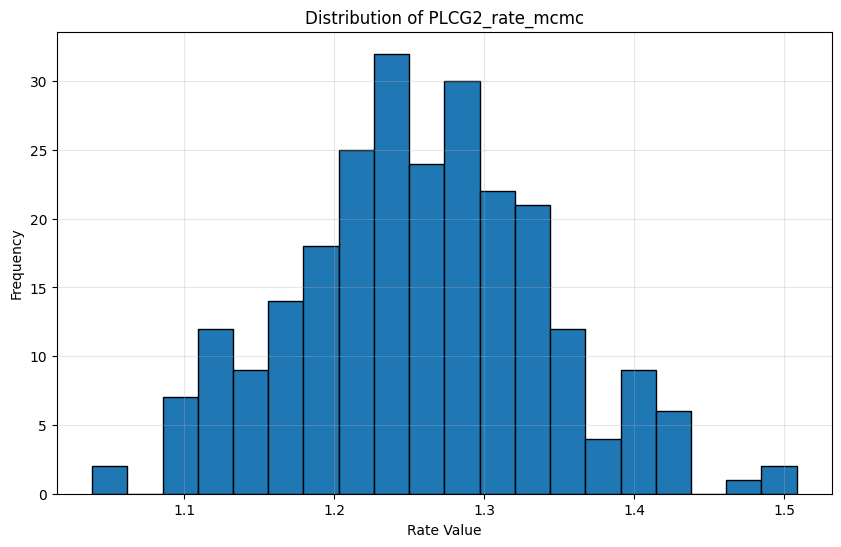

95% Confidence Interval: 1.26 (1.10, 1.42)


In [34]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(PLCG2_rate_mcmc, bins=20, edgecolor='black')
plt.title('Distribution of PLCG2_rate_mcmc')
plt.xlabel('Rate Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

# Print some basic statistics
print(f"95% Confidence Interval: {mean:.2f} ({lower_ci:.2f}, {upper_ci:.2f})")
